In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
train = pd.read_csv('input/sign_mnist_train.csv')
test = pd.read_csv('input/sign_mnist_test.csv')

In [95]:
train.head(50)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255
6,8,134,134,135,135,136,137,137,138,138,...,109,102,91,65,138,189,179,181,181,179
7,22,114,42,74,99,104,109,117,127,142,...,214,218,220,223,223,225,227,227,228,228
8,3,169,174,176,180,183,185,187,188,190,...,119,118,123,120,118,114,94,74,61,57
9,3,189,189,189,190,190,191,190,190,190,...,13,53,200,204,201,201,193,175,178,156


In [64]:
test.shape

(7172, 785)

In [82]:
labels = train['label'].values

In [83]:
labels

array([ 3,  6,  2, ..., 18, 17, 23])

In [84]:
len(labels)

27455

In [85]:
np.unique(np.array(labels))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [14]:
train.drop('label', axis = 1, inplace = True)

In [15]:
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [16]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [87]:
labels

array([ 3,  6,  2, ..., 18, 17, 23])

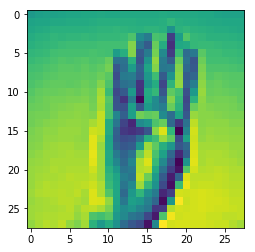

In [96]:
plt.imshow(images[29].reshape(28,28))

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [23]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

Using TensorFlow backend.


In [24]:
batch_size = 128
num_classes = 24
epochs = 50

In [25]:
x_train = x_train / 255
x_test = x_test / 255

In [26]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

In [27]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

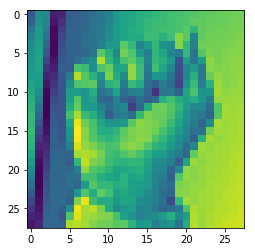

In [28]:
plt.imshow(x_train[0].reshape(28,28))

In [29]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(num_classes, activation = 'softmax'))

In [30]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [31]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Train on 19218 samples, validate on 8237 samples
Epoch 1/50
19218/19218 [==============================] - 39s 2ms/step - loss: 2.5260 - acc: 0.2135 - val_loss: 1.5493 - val_acc: 0.5302
Epoch 2/50
19218/19218 [==============================] - 38s 2ms/step - loss: 1.2191 - acc: 0.5906 - val_loss: 0.8175 - val_acc: 0.7281
Epoch 3/50
19218/19218 [==============================] - 38s 2ms/step - loss: 0.7431 - acc: 0.7463 - val_loss: 0.5076 - val_acc: 0.8393
Epoch 4/50
19218/19218 [==============================] - 38s 2ms/step - loss: 0.5266 - acc: 0.8247 - val_loss: 0.3481 - val_acc: 0.8827
Epoch 5/50
19218/19218 [==============================] - 38s 2ms/step - loss: 0.3735 - acc: 0.8722 - val_loss: 0.2365 - val_acc: 0.9268
Epoch 6/50
19218/19218 [==============================] - 37s 2ms/step - loss: 0.2686 - acc: 0.9098 - val_loss: 0.1648 - val_acc: 0.9518
Epoch 7/50
19218/19218 [==============================] - 38s 2ms/step - loss: 0.1937 - acc: 0.9389 - val_loss: 0.1043 - val_acc:

In [32]:
test_labels = test['label']

In [33]:
test.drop('label', axis = 1, inplace = True)

In [34]:
test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

In [35]:
test_labels = label_binrizer.fit_transform(test_labels)

In [36]:
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [37]:
test_images.shape

(7172, 28, 28, 1)

In [38]:
y_pred = model.predict(test_images)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(test_labels, y_pred.round())

0.9139709983268266

In [41]:
type(test_images)

numpy.ndarray

In [42]:
len(test_images)

7172

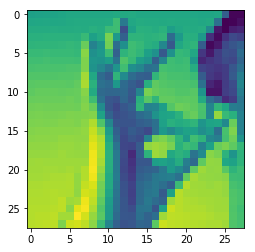

In [43]:
plt.imshow(x_test[0].reshape(28,28))

In [44]:
import cv2

In [45]:
test_img = cv2.imread('../cropped.png')

In [46]:
gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
gray = np.array(gray.flatten())

In [47]:
model.predict(gray)

ValueError: Error when checking input: expected conv2d_1_input to have 4 dimensions, but got array with shape (784, 1)

In [52]:
newtest_img = gray.reshape(1, 28, 28, 1)

In [55]:
t = model.predict(newtest_img)

In [54]:
test_labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [57]:
len(t[0])

24

In [58]:
t

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [59]:
labels[12]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0])

In [68]:
dir(model)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_inbound_node',
 '_base_init',
 '_built',
 '_check_trainable_weights_consistency',
 '_collected_trainable_weights',
 '_compute_previous_mask',
 '_expects_training_arg',
 '_feed_input_names',
 '_feed_input_shapes',
 '_feed_inputs',
 '_feed_loss_fns',
 '_feed_output_names',
 '_feed_output_shapes',
 '_feed_outputs',
 '_feed_sample_weight_modes',
 '_feed_sample_weights',
 '_feed_targets',
 '_function_kwargs',
 '_get_node_attribute_at_index',
 '_inbound_nodes',
 '_init_graph_network',
 '_init_subclassed_network',
 '_initial_weights',
 '_input_coordinates',
 '_input_layers',
 '_is_compiled',
 '_is_graph_networ

In [70]:
model.predict_classes(newtest_img)

array([12])

In [71]:
y_train[0]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [72]:
import pickle

In [77]:
pickle.dump(model, open('sign_model.sav','wb'))

TypeError: can't pickle _thread.RLock objects

In [76]:
model

In [78]:
model.save('sign_model.h5')

In [145]:
test_img2 = cv2.imread('../frame1600.jpg')

# test_img2 = np.array([np.reshape(test_img2, (28, 28))])
test_img2 = cv2.resize(test_img2,(28,28))

gray2 = cv2.cvtColor(test_img2, cv2.COLOR_BGR2GRAY)
gray2 = np.array(gray2.flatten())

gray2 = gray2.reshape(1, 28, 28, 1)

model.predict_classes(gray2)

array([6])

In [116]:
model.predict_classes(gray2)

array([0])